In [298]:
import nibabel as  nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


In [299]:
trainDataSetPath = "C:/Users/eric_/Data/BraTS2021Data"
filename = "BraTS2021_00006"

imageSet = {}

imageSet['T1'] = nib.load(trainDataSetPath + '/' + filename + '/' + filename + '_t1.nii').get_fdata()

imageSet['T1CE'] = nib.load(trainDataSetPath + '/' + filename + '/' + filename + '_t1ce.nii').get_fdata()

imageSet['FLAIR'] = nib.load(trainDataSetPath + '/' + filename + '/' + filename + '_flair.nii').get_fdata()

imageSet['T2'] = nib.load(trainDataSetPath + '/' + filename + '/' + filename + '_t2.nii').get_fdata()

imageSet['MASK'] =  nib.load(trainDataSetPath + '/' + filename + '/' + filename + '_seg.nii').get_fdata()



In [300]:
cropVals = [40, -40]
imageShape = np.shape(imageSet['T1'][cropVals[0]:cropVals[1],cropVals[0]:cropVals[1],:])


scaler = MinMaxScaler()

for image in imageSet:
    imageSet[image] = imageSet[image][cropVals[0]:cropVals[1],cropVals[0]:cropVals[1],:]
    if (image != 'MASK'):
        imageSet[image] = scaler.fit_transform(imageSet[image].reshape(-1, imageSet[image].shape[-1])).reshape(imageSet[image].shape)



In [301]:

maskImage = np.copy(imageSet['MASK']).astype('int8')

maskImage[maskImage==4] = 3

imageSet['MASK'] ={
    'WHOLE': np.where(maskImage>0, 1, 0),
    'NCR': np.where(maskImage!=1, 0, 1),
    'ED': np.where(maskImage!=2, 0 , 1),
    'ET': np.where(maskImage!=3, 0 , 1)
}

for image in imageSet:
    if (image != 'MASK'):    
        imageSet[image] = {
            'WHOLE': np.multiply(imageSet[image],(1-imageSet['MASK']['WHOLE'])),    
            'NCR': np.multiply(imageSet[image],imageSet['MASK']['NCR']),    
            'ED': np.multiply(imageSet[image],imageSet['MASK']['ED']),    
            'ET': np.multiply(imageSet[image],imageSet['MASK']['ET']),    
        }


In [312]:
#np.count_nonzero(imageSet['T1']['NCR'][:,:,sliceNum])
imagemean = np.mean(imageseq[imageseq>0])

0

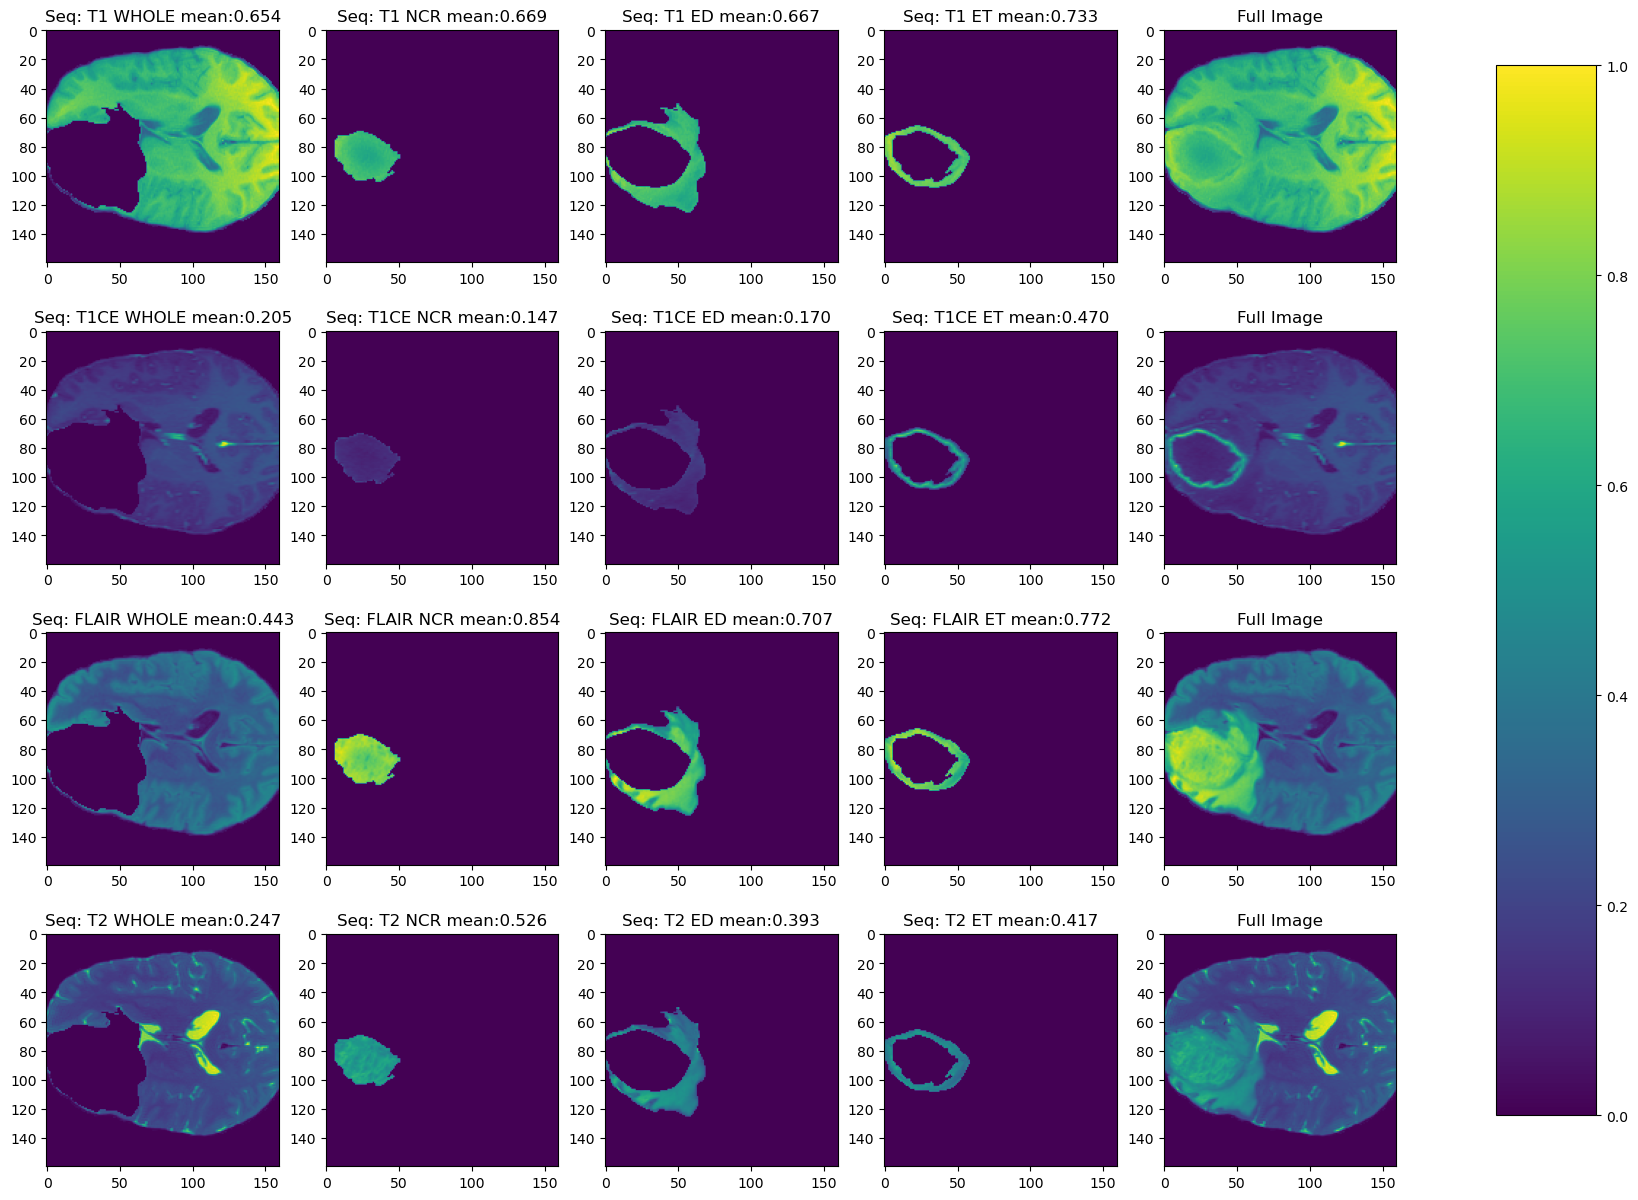

In [316]:
fig, ax = plt.subplots(len(imageSet)-1,len(imageSet['T1'])+1,figsize=(20,15))
fullIm = np.zeros((imageShape[0],imageShape[1]))
sliceNum = 70

for ii, image in enumerate(imageSet):
    if (image != 'MASK'):
        for jj,mask in enumerate(imageSet[image]) :
            imageseq = imageSet[image][mask] 
            imagemean = np.mean(imageseq[imageseq>0])
            imagePlot = ax[ii][jj].imshow(imageseq[:,:,sliceNum], vmin = 0, vmax = 1.0 )
            ax[ii][jj].set_title(f'Seq: {image} {mask} mean:{imagemean:0.3f}')
            fullIm += imageseq[:,:,sliceNum]
        
        imagePlot = ax[ii][jj+1].imshow(fullIm)
        ax[ii][jj+1].set_title(f'Full Image')
        fullIm = 0

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(imagePlot, cax=cbar_ax)



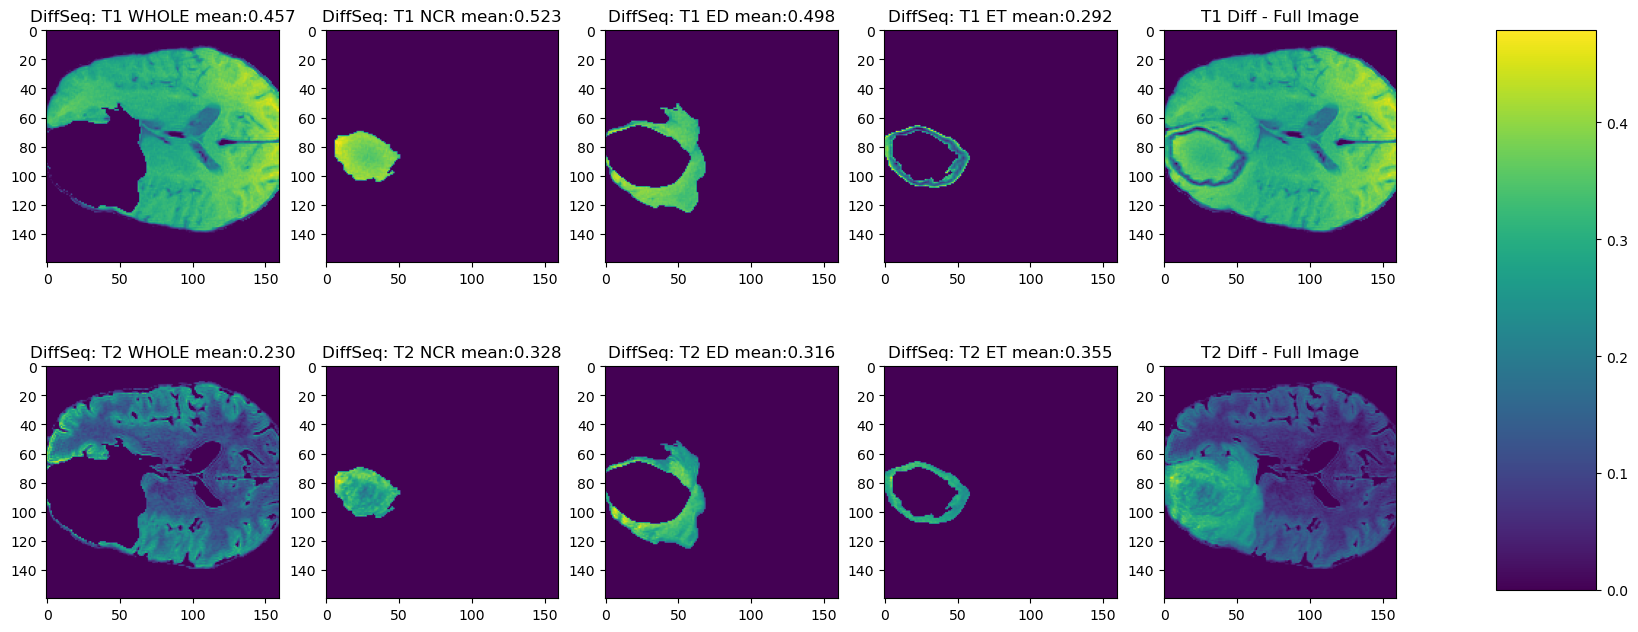

In [317]:
numDiffSeqs = 2
fig, ax = plt.subplots(numDiffSeqs,len(imageSet['T1'])+1,figsize=(20,8))
fullT1Im = np.zeros((imageShape[0],imageShape[1],imageShape[2]))
fullT2Im = np.zeros((imageShape[0],imageShape[1],imageShape[2]))

for jj,mask in enumerate(imageSet[image]) :
    diffT1seq = imageSet['T1'][mask] - imageSet['T1CE'][mask]
    diffT1seq[diffT1seq<0] = 0
    imagemean = np.mean(diffT1seq[diffT1seq>0])
    imagePlot = ax[0][jj].imshow(diffT1seq[:,:,sliceNum])
    ax[0][jj].set_title(f'DiffSeq: T1 {mask} mean:{imagemean:0.3f}')
    fullT1Im += diffT1seq

    diffT2seq = imageSet['FLAIR'][mask] - imageSet['T2'][mask]
    diffT2seq[diffT2seq<0] = 0
    imagemean = np.mean(diffT2seq[diffT2seq>0])
    imagePlot = ax[1][jj].imshow(diffT2seq[:,:,sliceNum])
    ax[1][jj].set_title(f'DiffSeq: T2 {mask} mean:{imagemean:0.3f}')
    fullT2Im += diffT2seq
    

imagePlot = ax[0][jj+1].imshow(fullT1Im[:,:,sliceNum])
ax[0][jj+1].set_title(f'T1 Diff - Full Image')

imagePlot = ax[1][jj+1].imshow(fullT2Im[:,:,sliceNum])
ax[1][jj+1].set_title(f'T2 Diff - Full Image')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(imagePlot, cax=cbar_ax)
